# Análisis de paquetes

In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import import_ipynb
import utils as utils

importing Jupyter notebook from utils.ipynb


Graficar entropia a medida que llegan paquetes

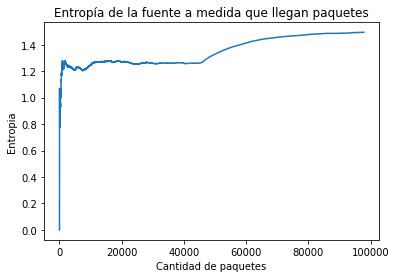

In [2]:
plt.plot(utils.get_entropy())
plt.title("Entropía de la fuente a medida que llegan paquetes")
plt.xlabel("Cantidad de paquetes")
plt.ylabel("Entropia")
plt.show()

Análisis de la fuente final: 
 - Cantidad de Broadcast vs Unicast 

In [3]:
unicast_broadcast_symbol, protocol, percent_unicast, percent_broadcast , symbol_proba= utils.show_source()
print("percent unicast", percent_unicast)
print("percent broadcast", percent_broadcast)

percent unicast 0.57704
percent broadcast 0.42295


- Porcentaje de cada protocolo

In [4]:
percent_per_protocol = {p : 0 for p in np.unique(protocol)}


for s, proba in symbol_proba.items():
    percent_per_protocol[s[0]] += proba

print("porcentaje por protocolo \n", percent_per_protocol)


porcentaje por protocolo 
 {' 2048': 0.8752800000000001, ' 2054': 0.01475, ' 2697': 0.00019, ' 34525': 0.10977}


- Gráfico de la fuente

{' 2048': 0.4641, ' 2054': 0.00317, ' 34525': 0.10977}
{' 2048': 0.41118, ' 2054': 0.01158, ' 2697': 0.00019}


[]

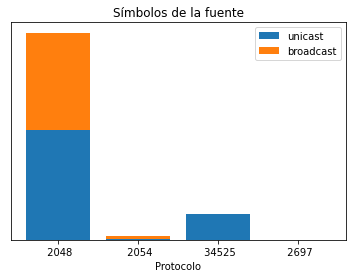

In [5]:
protocols_unique = np.unique(protocol)
unicast = {}
broadcast = {}

for p in protocols_unique:
    if((p, 'UNICAST') in list(symbol_proba.keys())):
        unicast[p] = symbol_proba[(p, 'UNICAST')] 
    else:
        if(not (p, 'BROADCAST') in symbol_proba.keys()):
            unicast[p] = 0
    if((p, 'BROADCAST') in list(symbol_proba.keys())):
        broadcast[p] = symbol_proba[(p, 'BROADCAST')] 
    else:
        if(not (p, 'UNICAST') in symbol_proba.keys()):
            broadcast[p] = 0

print(unicast)
print(broadcast)

fig, ax = plt.subplots()

ax.bar(unicast.keys(), list(unicast.values()), label = "unicast")
ax.bar(broadcast.keys(), list(broadcast.values()), bottom=list(unicast.values()), label = "broadcast")
plt.xlabel("Protocolo")
ax.set_title("Símbolos de la fuente")
ax.legend()
ax.set_yticks([])

/tmp/ipykernel_6844/3739716252.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(protocols_unique)


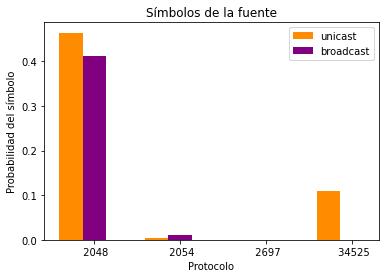

In [20]:
unicast = {}
broadcast = {}

for p in protocols_unique:
    if((p, 'UNICAST') in list(symbol_proba.keys())):
        unicast[p] = symbol_proba[(p, 'UNICAST')] 
    else:
        unicast[p] = 0
    if((p, 'BROADCAST') in list(symbol_proba.keys())):
        broadcast[p] = symbol_proba[(p, 'BROADCAST')] 
    else:
        
        broadcast[p] = 0

x_protocols = np.arange(len(protocols_unique))

fig, ax = plt.subplots()
width = 0.27
ax.bar(x_protocols, list(unicast.values()),width = width, label = "unicast", color = "darkorange")
ax.bar(x_protocols + width, list(broadcast.values()), width = width,label = "broadcast", color = "purple")

plt.xlabel("Protocolo")
plt.ylabel("Probabilidad del símbolo")
ax.set_title("Símbolos de la fuente")
ax.set_xticklabels(protocols_unique)
ax.set_xticks(x_protocols+width)
ax.legend()

- Información de los símbolos

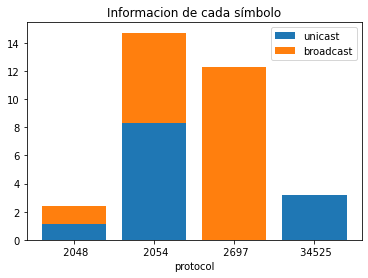

In [7]:
unicastRes, broadcastRes, sumRes, info_symbol = utils.informationForSymbol()

fig, ax = plt.subplots()
ax.bar(unicastRes.keys(), list(unicastRes.values()), label = "unicast")
ax.bar(broadcastRes.keys(), list(broadcastRes.values()), bottom=list(unicastRes.values()), label = "broadcast")
plt.xlabel("protocol")
ax.set_title("Informacion de cada símbolo")
ax.legend()

/tmp/ipykernel_6844/2232053883.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(protocols_unique)


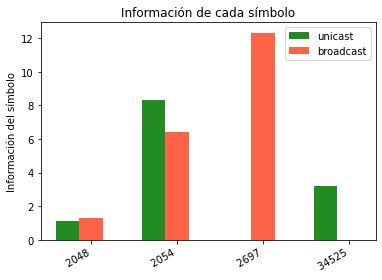

In [21]:
unicast_info = {}
broadcast_info = {}

for p in protocols_unique:
    
    if((p, "'UNICAST'") in list(info_symbol.keys())):
        unicast_info[p] =info_symbol[(p, "'UNICAST'")] 
    else:
        unicast_info[p] = 0
    if((p, "'BROADCAST'") in list(info_symbol.keys())):
        broadcast_info[p] =info_symbol[(p, "'BROADCAST'")] 
    else:
        
        broadcast_info[p] = 0

x_protocols = np.arange(len(protocols_unique))
width = 0.27

fig, ax = plt.subplots()


ax.set_title("Información de cada símbolo")
ax.bar(x_protocols, unicast_info.values(), width = width,  color = "forestgreen")
ax.bar(x_protocols + width, broadcast_info.values(), width = width,color = "tomato")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.legend(("unicast", "broadcast"))
ax.set_ylabel("Información del símbolo")
ax.set_xticklabels(protocols_unique)
ax.set_xticks(x_protocols+width)
plt.show()